https://www.analyticsvidhya.com/blog/2021/04/interesting-kaggle-datasets-every-beginner-in-data-science-should-try-out/

Peguei essa base de dados aqui 

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from google.colab import files 
import sklearn 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
df = pd.read_csv('insurance.csv')
df_original = df.copy()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [4]:
#vou fazer uma regressão pra saber quanto fumar impacta nas despesas médicas. Vou criar um dataframe com as colunas que eu quero

#primeiramente tenho que conveter sex em dummys. Vou colocar female como 1. Vou colocar smoker como dummy também, yes = 1

df['sex']=df['sex'].replace({'female':1,'male':0})
df['smoker']=df['smoker'].replace({'yes':1,'no':0})



In [5]:
mod = smf.ols('charges~age + bmi + children + smoker',df)
reg = mod.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 25 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:36:21   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.0

In [ ]:
#equação de previsão
idade = 25 
imc = 24
filhos = 0 
fuma = 0

despesa = reg.params[0] + idade*reg.params[1] + imc*reg.params[2] + filhos*reg.params[3] + fuma*reg.params[4] 
print('sua despesa médica seria: {:.2f} USD'.format(despesa)) 

sua despesa médica seria: 2067.90 USD


In [ ]:
u=reg.resid
u.describe()

count    1.338000e+03
mean     1.533838e-11
std      6.058704e+03
min     -1.189794e+04
25%     -2.920755e+03
50%     -9.865948e+02
75%      1.392246e+03
max      2.950961e+04
dtype: float64

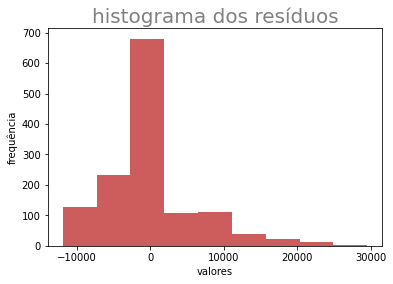

In [ ]:
plt.hist(u, bins=9, color='IndianRed')
plt.title('histograma dos resíduos', fontsize=20, color='grey')
plt.xlabel('valores',fontsize=10)
plt.ylabel('frequência', fontsize=10)
plt.show()

In [ ]:
#testando normalidade dos resíduos com shapiro wilk

from scipy.stats import shapiro 

stat, p = shapiro(u)

print('Hipóteses do teste de Shapiro-Wilk \n \n H0:dados obedecem distribuição normal \n H1: dados não obedecem distribuição normal')
print()
print('p-valor do teste:', p) 
alpha = 0.05 
print()
if p < alpha:
  print('resíduos normais (não rejeita H0)')
else:
  print('resíduos não-normais (rejeita Ho)')

Hipóteses do teste de Shapiro-Wilk 
 
 H0:dados obedecem distribuição normal 
 H1: dados não obedecem distribuição normal

p-valor do teste: 9.994060343391657e-29

resíduos normais (não rejeita H0)


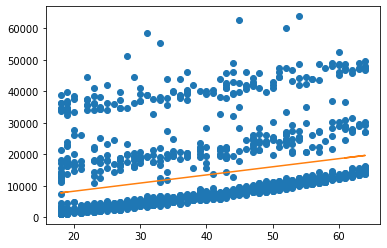

In [ ]:
#vou plotar um gráfico da relação charge x variáveis

#colocar uma linha (fit line) usando polyfit do numpy

y = df['charges']
x = df['age']
m, b = np.polyfit(x, y, 1) 


plt.plot(x,y,'o')
plt.plot(x, m*x + b)
plt.show()

##DESAFIO 2: TENTAR CLUSTERIZAR PESSOAS BASEADAS EM SUAS CARACTERÍSTICAS

In [8]:
df['region'].value_counts()

#vou transformar southeast em 1, southwest em 2, northeast em 3 e northwest em 4

df['region'] = df['region'].replace({'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4})

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


In [16]:
#rodar um kmeans pra clusterizar 

from sklearn.cluster import KMeans

#vou criar um dataframe com as variáveis que eu quero (que são todas, menos 'charges')

X = df[['age','sex','bmi','children','smoker','region']].copy()

In [18]:
#vou tentar com  clusters, sendo baixo, médio e alto risco de morte(?). São clusters de nível de saúde basicamente. 

kmeans = KMeans(n_clusters=3, random_state=0).fit(X) 

In [25]:
#kmeans.labels_ mostra os grupos que ele criou
#posso adicionar uma variável no dataframe com as classes de cada pessoa

df['clusters'] = kmeans.labels_

#dei um value_counts nessa nova coluna e descobri as quantidades de cada cluster: 1 = 471   2 =  441   0 =  426

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


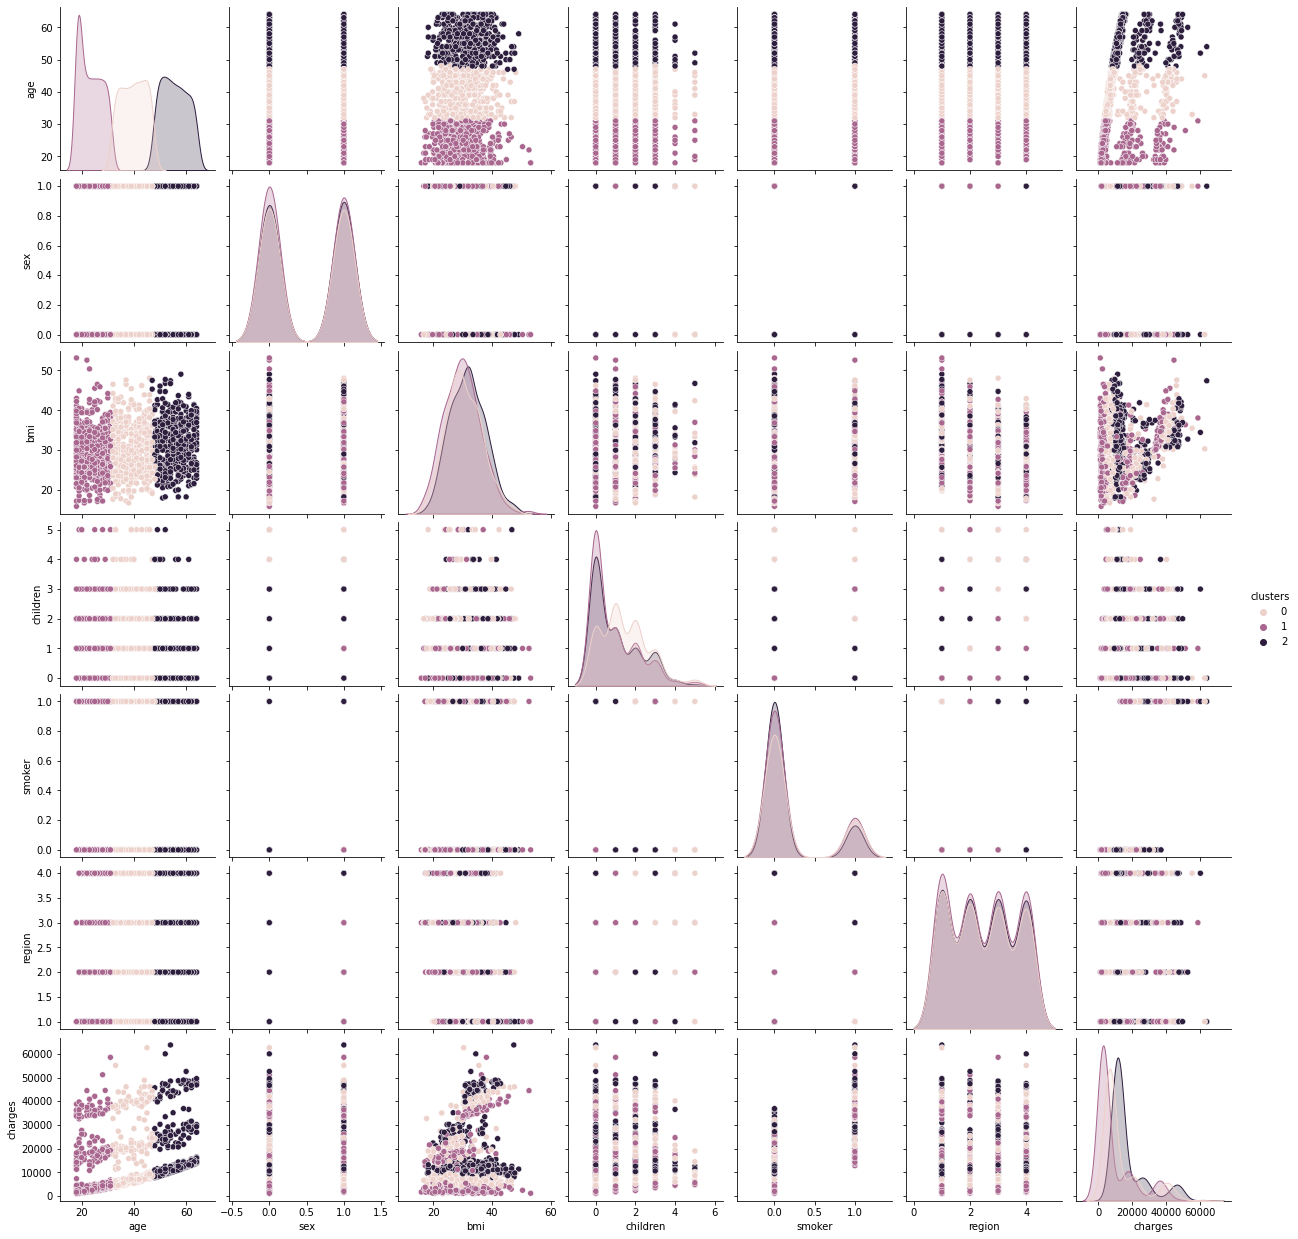

In [29]:
#dando um pairplot do seaborn pra visualizar

sns.pairplot(df, 'clusters')

#me gerou ótimos insights. Dividiu em tres cores, vermelho, amarelo e preto. Dá pra ver que o preto são os mais velhos, os com maior IMC, que sexo não fez diferença (na regressão ele é não-significativo),
# 

##COMENTÁRIOS (3 clusters)

Tive bons resultados com 3 clusters, mas uns estranhos. Ex: fumar ficou igualmente distribuído entre os clusters, eu esperava muito mais pontos pretos (de maior risco) no valor 1 (fumante). Idade ficou bom, cluster preto (saúde pior) nosmais velhos; charges ficou bom também; região e filhos foi indiferente; bmi (IMC)ficou ruim também, ficou uma relação vertical enquanto eu esperava uma horizontal (preto na fatia de cima, pq mais gordos tem saúde pior).



In [31]:
#vou tentar clusterizar com 2 agora.

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X) 

In [33]:
df['clusters2'] = kmeans2.labels_

df['clusters2'].value_counts()

0    671
1    667
Name: clusters2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


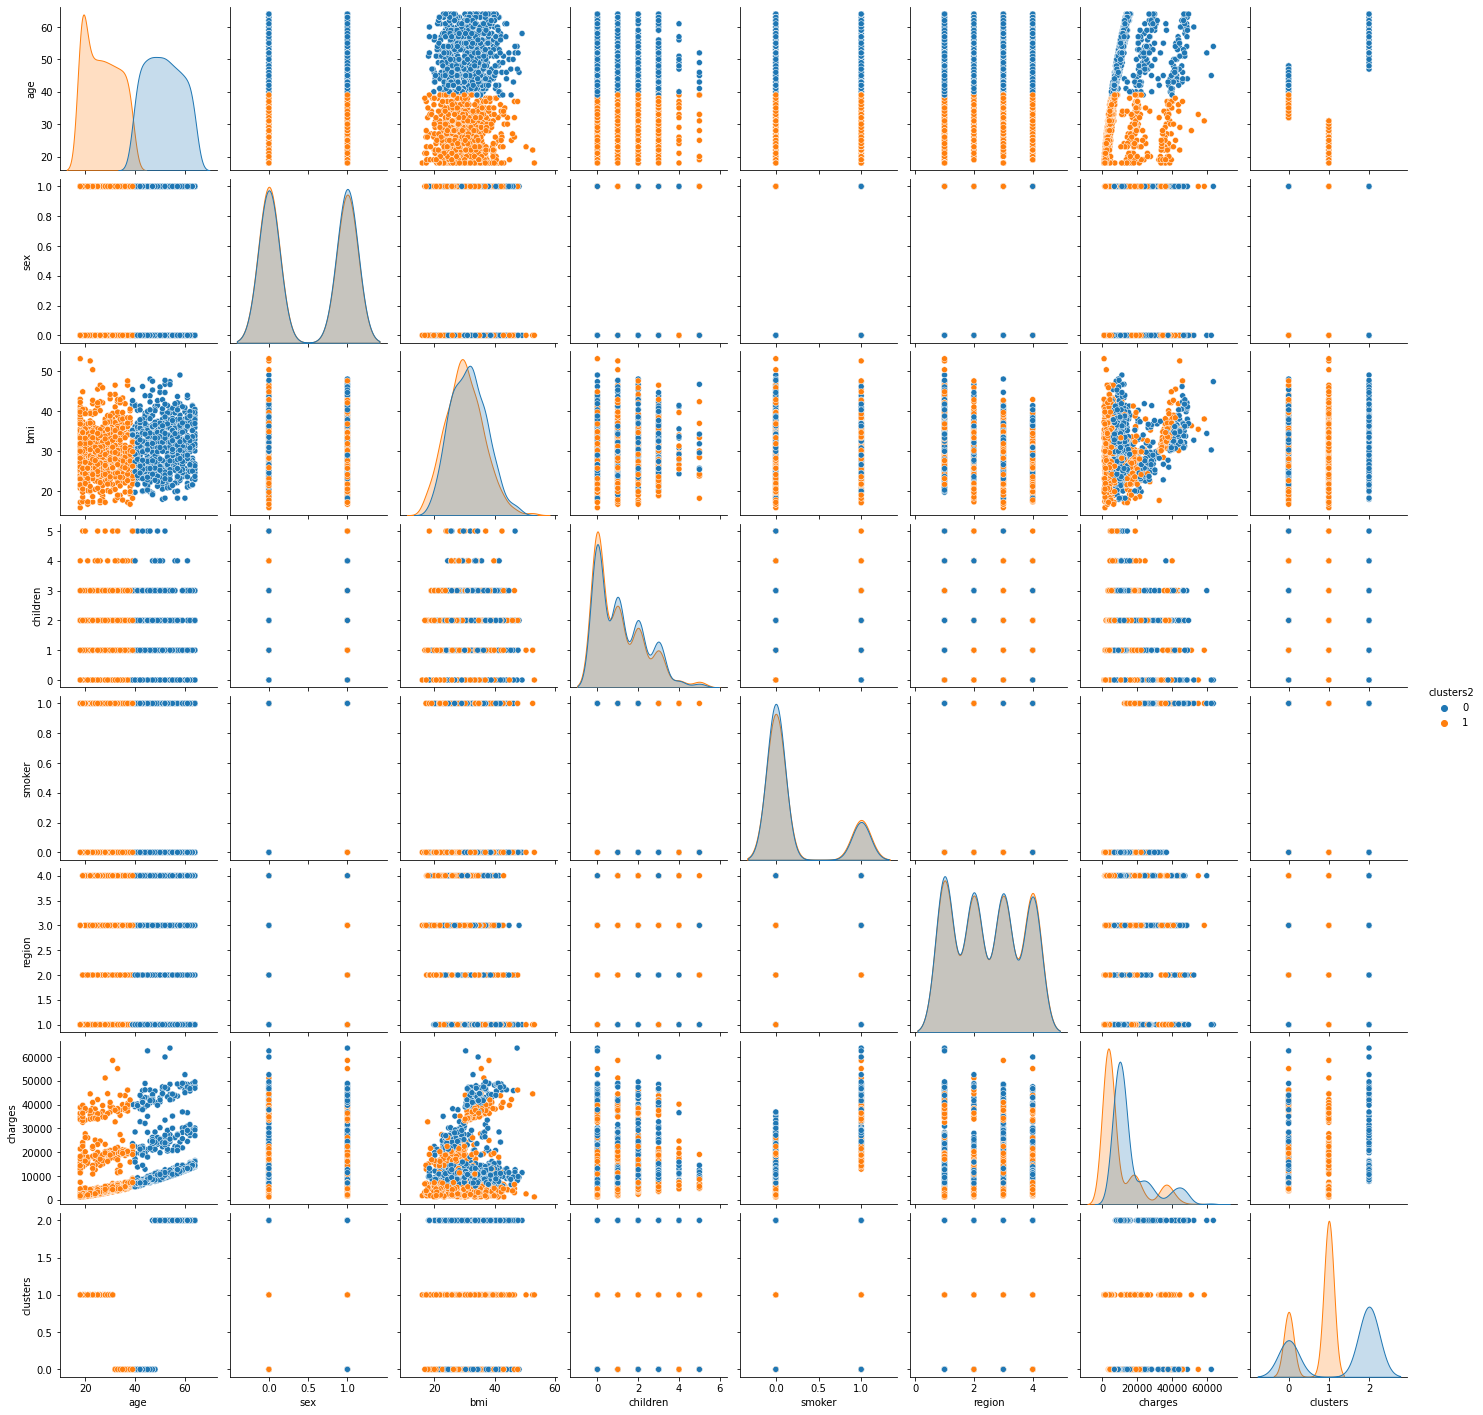

In [34]:
#vou usar um pairplot agora, lembrando que já tem uma coluna 'clusters', que era a análise com 3 clusters. 

sns.pairplot(df,'clusters2')

##COMENTÁRIO 2 CLUSTERS

Os mesmos problemas continuaram. Uma coisa interessante é o clusters2 no pairplot juntamente com o clusters (que eu fiz com 3 clusters). Dá pra ver claramente que o cluster extra foi dividido exatamente pela metade pra caber nos 2 cluster que rodei no 'clusters2'. 